In [1]:
import ramCOH.functions as f
import numpy as np
import matplotlib.pyplot as plt
import meltInc.plotStyle as ps

ps.layout()

In [2]:
ol_file = "./olivine/PI032-04-01_2022_03_01_15_42_56_532nm_Edge_100�_x50_VIS_LWD_H150_1800 (450-850nm)_5s x 2_01.txt"
x, y = np.genfromtxt(ol_file, unpack=True)

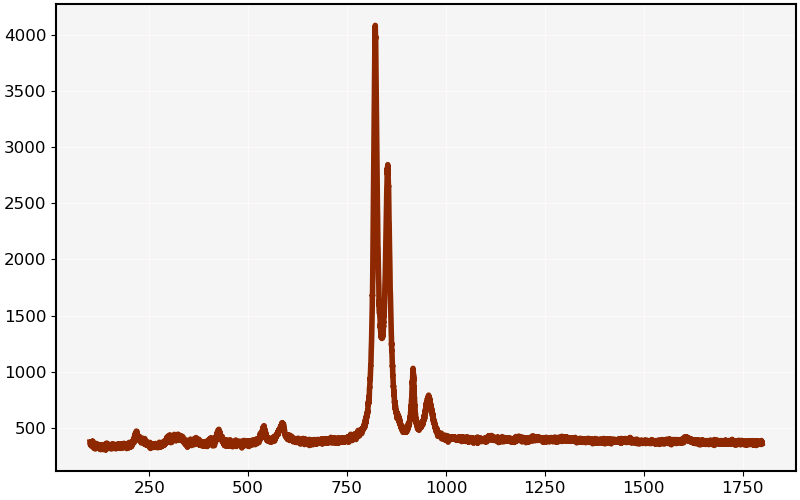

In [3]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, y)
plt.show()

In [4]:
amplitudes, centers, widths = f._find_peak_parameters(x, y, 2)
centers, widths

(array([217.11 , 322.148, 426.14 , 540.506, 585.14 , 821.372, 852.991,
        916.888, 956.275]),
 array([ 8.76235328, 23.76401617, 13.13110008,  8.43089525, 15.86403978,
        11.48778461,  9.58422953,  7.92505376, 16.20305891]))

In [5]:
ranges = f._get_peakFit_ranges(centers, widths, 4)
ranges

[[182.060586895173, 478.66440030493686],
 [506.78241899264833, 648.5961591246338],
 [775.4208615478717, 1021.0872356523158]]

In [21]:
test = ranges[2]
xtrim, ytrim = f._trimxy_ranges(x, y, test)

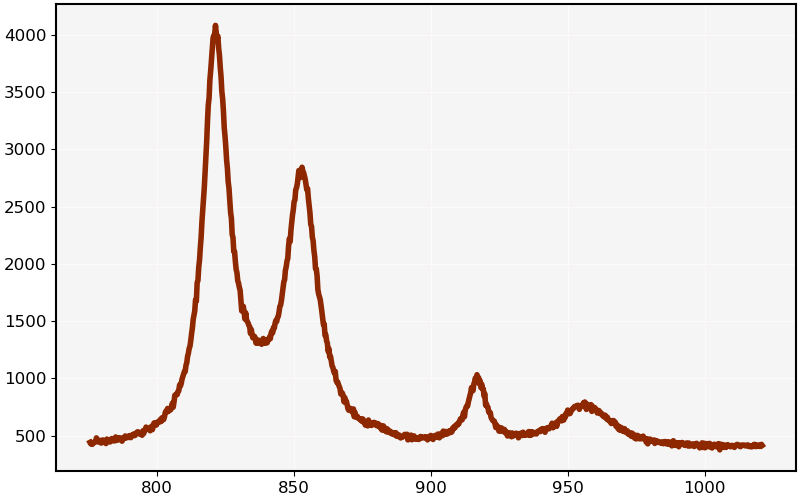

In [22]:
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(xtrim, ytrim)
plt.show()

In [23]:
noise, spline = f._calculate_noise(xtrim, ytrim)
noise

13.89507713064726

In [24]:
params, r2, fit_noise = f.deconvolve_curve(xtrim, ytrim, noise_threshold= 1.5, prominence=3)
print(r2, fit_noise)

0.9999971176241808 17.420067257826936


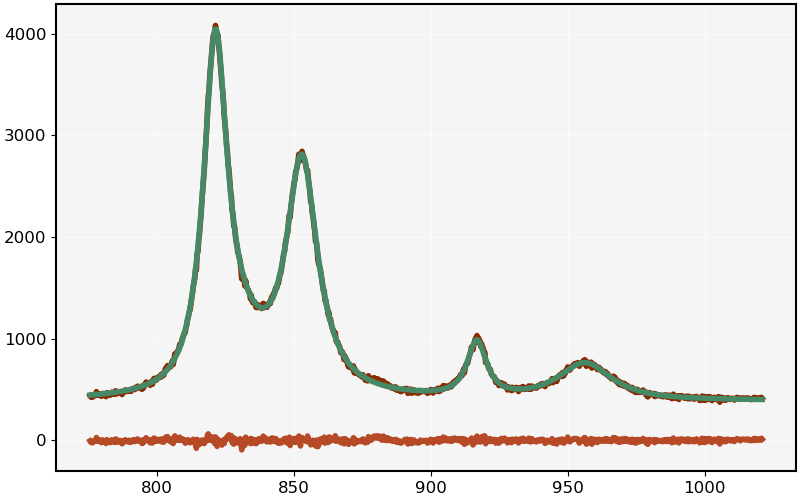

In [25]:
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(xtrim, ytrim)
plt.plot(xtrim, f.sum_GaussLorenz(xtrim, *params))
plt.plot(xtrim, ytrim - f.sum_GaussLorenz(xtrim, *params))
# plt.plot(xtrim, )
plt.show()

In [26]:
params

array([[8.21333652e+02, 8.52921734e+02, 9.16852852e+02, 9.56327803e+02,
        8.28331566e+02],
       [3.26183987e+03, 2.32860656e+03, 5.43619879e+02, 3.58595133e+02,
        3.76938248e+02],
       [5.14033925e+00, 7.02213355e+00, 4.20562204e+00, 1.13180291e+01,
        9.53217914e+00],
       [9.62934445e-01, 9.71776305e-01, 9.06662748e-01, 8.44812260e-01,
        1.28730654e-14],
       [3.83614776e+01, 3.89005382e+01, 3.88739508e+01, 3.88641955e+01,
        3.82992827e+01]])